In [132]:
GAS_List_Coordinat = [['55.554771','37.924931'],['60.765833','28.808552'],
                      ['55.798510','37.534730'],['55.862126','37.466772'],
                      ['55.848817','36.805567'],['53.041525','158.637171']]

Construction_List_Coordinat = [['55.558834','37.815781'],['55.900693','37.478917'],
                               ['56.359825','37.542558'],['53.064992','158.619518'],
                               ['55.847763','37.636684']]

Banks_List_Coordinat = [['55.728849','37.620321'],['56.342179','37.523720'],
                        ['56.007639','37.484526'],['55.782977','37.640659'],
                        ['53.019530','158.647842'],['55.630446','37.658377'],
                        ['55.633323','37.650055'],['55.909247','37.590461']]

In [133]:
## Установка библиотек если потребуется
#pip install seaborn
import pandas as pd
# import datetime as dt
import sqlite3
# import matplotlib.pyplot as plt
import seaborn as sns
from math import pi,sqrt,sin,cos,atan2

In [134]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import sqlite3

## Подключаемся к источнику

In [135]:
conn = sqlite3.connect('work_mode.db')
query = '''
SELECT client_id, time, latitude, longitude, altitude, speed, course, sat, name
FROM work_mode;
'''
df = pd.read_sql_query(query,conn)

### Предобработка

##### Посмотрим на полученные данные

In [136]:
df.head(15)

,client_id,time,latitude,longitude,altitude,speed,course,sat,name
0,40,09.09.2020 15:34,55.84783937,37.57457114,183.9,39.0,349.3,10,
1,40,09.09.2020 15:34,55.84793231,37.57455089,183.9,38.0,353.0,10,
2,40,09.09.2020 15:34,55.84802312,37.57451826,183.7,36.0,348.6,10,
3,40,09.09.2020 15:34,55.8481043,37.57448046,183.4,34.0,345.4,10,
4,40,09.09.2020 15:34,55.84818198,37.57444928,182.8,32.0,347.3,10,
5,40,09.09.2020 15:34,55.84825631,37.57442682,182.9,31.0,350.4,10,
6,40,09.09.2020 15:34,55.84832591,37.57439539,183.4,29.0,345.8,10,
7,40,09.09.2020 15:34,55.84839284,37.57433882,181.3,27.0,334.6,10,
8,40,09.09.2020 15:34,55.84845355,37.57434247,182.5,25.0,1.9,11,
9,40,09.09.2020 15:34,55.8485143,37.57431783,182.4,24.0,347.2,13,


##### Изучим типы данных

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474828 entries, 0 to 474827
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   client_id  474828 non-null  object
 1   time       474828 non-null  object
 2   latitude   474828 non-null  object
 3   longitude  474828 non-null  object
 4   altitude   474828 non-null  object
 5   speed      474828 non-null  object
 6   course     474828 non-null  object
 7   sat        474828 non-null  object
 8   name       474828 non-null  object
dtypes: object(9)
memory usage: 32.6+ MB


##### Посчитаем количество дубликатов

In [138]:
df.duplicated().sum()

414338

##### Удалим дубли и проверим еще раз

In [139]:
df = df.drop_duplicates().reset_index(drop = True)
df.duplicated().sum()

0

##### Количество уникальных записей:

In [140]:
df.isnull().count()

client_id    60490
time         60490
latitude     60490
longitude    60490
altitude     60490
speed        60490
course       60490
sat          60490
name         60490
dtype: int64

##### Преобразуем client_id, sat в тип (Int), time в (datetime), столбцы speed,altitude и course в тип (float)

In [141]:
df['client_id'] = df['client_id'].astype('int')
df['time'] = df['time'].apply(pd.to_datetime)
df['altitude'] = df['altitude'].astype('float')
df['speed'] = df['speed'].astype('float') 
df['course'] = df['course'].astype('float')
df['sat'] = df['sat'].astype('int')

df['latitude'] = df['latitude'].astype('float')
df['longitude'] = df['longitude'].astype('float')

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60490 entries, 0 to 60489
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   client_id  60490 non-null  int64         
 1   time       60490 non-null  datetime64[ns]
 2   latitude   60490 non-null  float64       
 3   longitude  60490 non-null  float64       
 4   altitude   60490 non-null  float64       
 5   speed      60490 non-null  float64       
 6   course     60490 non-null  float64       
 7   sat        60490 non-null  int64         
 8   name       60490 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 4.2+ MB


##### Построим график "Ящик с усами" для определения аномалий в данных по скоростям

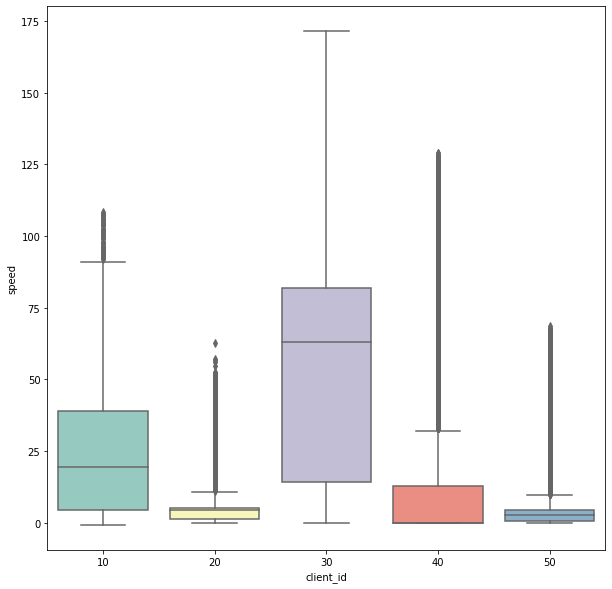

In [144]:
ax = sns.boxplot(x="client_id", y="speed",
                 data=df, palette="Set3")

In [147]:
# Сделаем срез данных по скорости
df = df.query('speed <= 80') #speed limit

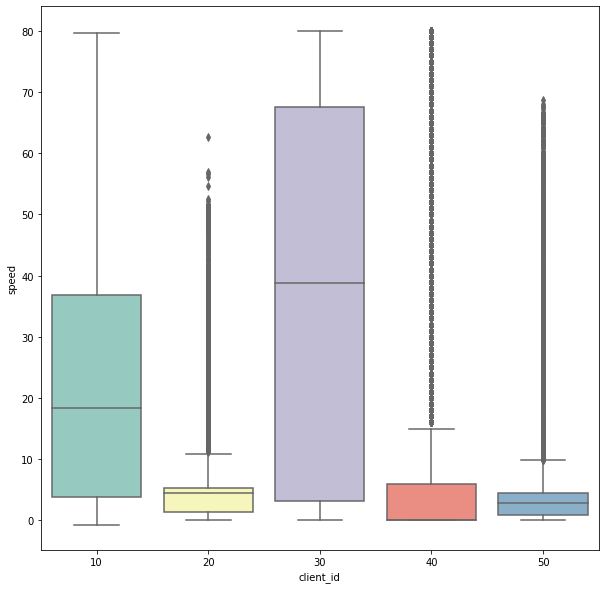

In [148]:
ax = sns.boxplot(x="client_id", y="speed",
                 data=df, palette="Set3")

##### Посмотрим на предобработанные данные

In [149]:
df_1 = df.reset_index(drop=True)

# df['speed'] = pd.to_numeric(df.speed)
# df['latitude'] = pd.to_numeric(df.latitude)
# df['longitude'] = pd.to_numeric(df.longitude)

df_1 = df_1.groupby(by = ['client_id','time']).agg({'speed':'mean', 'latitude':'mean', 'longitude':'mean' })
#df_1 = df
df = df.sort_values(by=['client_id', 'time'])
df_1['speed_mean'] = df_1.speed.rolling(window=5).mean()
df_1.shape

(1380, 4)

In [150]:
X_2 = df_1.dropna() # очистка пустых значений

In [151]:
from sklearn.mixture import GaussianMixture # подготовка к обучениею модели кдастеризации EM алгоритм

gm = GaussianMixture(n_components=4, 
                       max_iter=100,
                    init_params='kmeans',
                    random_state=42)
X_2 = X_2.reset_index()
X_2 = X_2.set_index('time')
X_2 =X_2.drop(columns=['client_id'])
#X_2

In [152]:
from sklearn.metrics import silhouette_score
gm.fit(X_2) #обучение модели
y_pred = gm.predict(X_2) # предсказание


# показываем, сколько кластеров и значений в них предсказано, -1 считаем выбросом
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{0: 744, 1: 163, 2: 120, 3: 349}

In [153]:
silhouette_score(X=X_2, labels=y_pred) # качество силуэта кластеризации

0.6061064136721537

In [154]:
X_4 = df_1.dropna()# добавление client_id в таблицу   
X_4 = X_4.reset_index()
X_5 = X_4.client_id
X_2 = X_2.reset_index()
X_2['client_id'] = X_5

In [155]:
df_preg = pd.Series(data=y_pred, name='prediction') # добавление предсказаний в таблицу    
X_3 = pd.DataFrame({'y_pred':df_preg})  
X_2 = X_2.reset_index()
X_2['predict'] = X_3

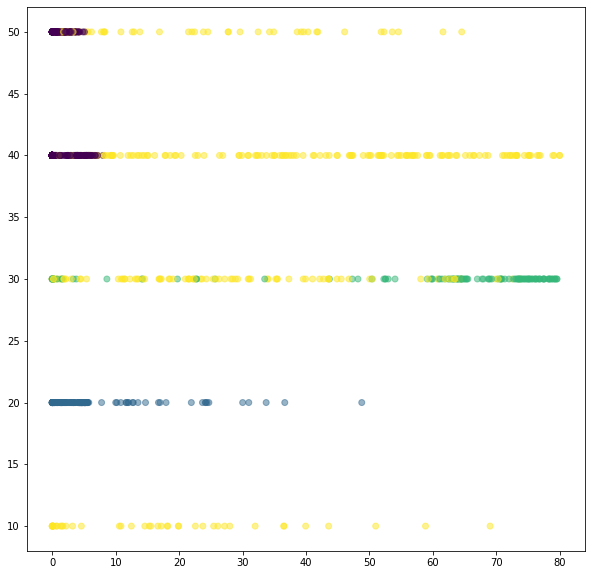

In [156]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X_2['speed'], X_2['client_id'], c=y_pred, alpha=0.5, label='class 2')
plt.show() # визуаливация кластеризации - разбивка клиент и его скорость (видно профиль передвижений), желтый - авто, зеленый - гонщик?, 
#синий - общественный транспорт, фиолетовый - пешеход

In [157]:
df = X_2

In [158]:
df.head(15)

,index,time,speed,latitude,longitude,speed_mean,client_id,predict
0,0,2020-08-09 15:12:00,16.629825,55.562714,37.821099,37.719426,10,3
1,1,2020-08-09 15:13:00,36.488333,55.562117,37.815221,34.858632,10,3
2,2,2020-08-09 15:14:00,17.179592,55.560179,37.811548,29.375883,10,3
3,3,2020-08-09 15:15:00,0.000000,55.560465,37.810754,21.119883,10,3
4,4,2020-08-09 15:16:00,0.000000,55.560465,37.810754,14.059550,10,3
5,5,2020-08-09 15:17:00,0.000000,55.560465,37.810754,10.733585,10,3
6,6,2020-08-09 15:18:00,1.488889,55.560463,37.810748,3.733696,10,3
7,7,2020-08-09 15:19:00,14.586667,55.560390,37.809306,3.215111,10,3
8,8,2020-08-09 15:20:00,27.170000,55.559469,37.811872,8.649111,10,3
9,9,2020-08-09 15:21:00,10.825000,55.558049,37.815099,10.814111,10,3


Добавим столбцы с координатами всех точек

In [159]:
# Список POI
poi_list = []
poi_name = ''
i = 0
for poi in GAS_List_Coordinat:
    latitude = poi[0]
    longitude = poi[1]
    poi_name = f'GAS_{i}'
    df[f'{poi_name}_latitude'] = float(latitude)
    df[f'{poi_name}_longitude'] = float(longitude)
    poi_list.append(f'{poi_name}')
    i = i+1
    
poi_name = ''
i = 0
for poi in Construction_List_Coordinat:
    latitude = poi[0]
    longitude = poi[1]
    poi_name = f'Construction_{i}'
    df[f'{poi_name}_latitude'] = float(latitude)
    df[f'{poi_name}_longitude'] = float(longitude)
    poi_list.append(f'{poi_name}')
    i = i+1
    
poi_name = ''
i = 0
for poi in Banks_List_Coordinat:
    latitude = poi[0]
    longitude = poi[1]
    poi_name = f'Bank_{i}'
    df[f'{poi_name}_latitude'] = float(latitude)
    df[f'{poi_name}_longitude'] = float(longitude)
    poi_list.append(f'{poi_name}')
    i = i+1

In [182]:
def get_dist(row):
    lat1 = row[f'{poi}_latitude']
    long1 = row[f'{poi}_longitude']
    lat2 = row['latitude']
    long2 = row[f'longitude']

    degree_to_rad = float(pi / 180.0)

    d_lat = (lat2 - lat1) * degree_to_rad
    d_long = (long2 - long1) * degree_to_rad

    a = pow(sin(d_lat / 2), 2) + cos(lat1 * degree_to_rad) * cos(lat2 * degree_to_rad) * pow(sin(d_long / 2), 2)
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    m = 6371000 * c
    
return m

In [189]:
# И применим ее
for poi in poi_list:    
    df[f'm_to_{poi}'] = df.apply(get_dist,axis=1)

In [190]:
df

,index,time,speed,latitude,longitude,speed_mean,client_id,predict,GAS_0_latitude,GAS_0_longitude,...,m_to_Construction_3,m_to_Construction_4,m_to_Bank_0,m_to_Bank_1,m_to_Bank_2,m_to_Bank_3,m_to_Bank_4,m_to_Bank_5,m_to_Bank_6,m_to_Bank_7
0,0,2020-08-09 15:12:00,16.629825,55.562714,37.821099,37.719426,10,3,55.554771,37.924931,...,41148.984928,41148.984928,41148.984928,41148.984928,41148.984928,41148.984928,41148.984928,41148.984928,41148.984928,41148.984928
1,1,2020-08-09 15:13:00,36.488333,55.562117,37.815221,34.858632,10,3,55.554771,37.924931,...,41083.705972,41083.705972,41083.705972,41083.705972,41083.705972,41083.705972,41083.705972,41083.705972,41083.705972,41083.705972
2,2,2020-08-09 15:14:00,17.179592,55.560179,37.811548,29.375883,10,3,55.554771,37.924931,...,41208.638648,41208.638648,41208.638648,41208.638648,41208.638648,41208.638648,41208.638648,41208.638648,41208.638648,41208.638648
3,3,2020-08-09 15:15:00,0.000000,55.560465,37.810754,21.119883,10,3,55.554771,37.924931,...,41161.928284,41161.928284,41161.928284,41161.928284,41161.928284,41161.928284,41161.928284,41161.928284,41161.928284,41161.928284
4,4,2020-08-09 15:16:00,0.000000,55.560465,37.810754,14.059550,10,3,55.554771,37.924931,...,41161.928284,41161.928284,41161.928284,41161.928284,41161.928284,41161.928284,41161.928284,41161.928284,41161.928284,41161.928284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371,1371,2020-10-09 17:00:00,4.813158,55.848395,37.637784,3.051733,50,0,55.554771,37.924931,...,7382.217460,7382.217460,7382.217460,7382.217460,7382.217460,7382.217460,7382.217460,7382.217460,7382.217460,7382.217460
1372,1372,2020-10-09 17:08:00,2.034783,55.848325,37.638693,2.949844,50,0,55.554771,37.924931,...,7412.225648,7412.225648,7412.225648,7412.225648,7412.225648,7412.225648,7412.225648,7412.225648,7412.225648,7412.225648
1373,1373,2020-10-09 17:09:00,2.772222,55.847979,37.638353,3.038455,50,0,55.554771,37.924931,...,7438.863656,7438.863656,7438.863656,7438.863656,7438.863656,7438.863656,7438.863656,7438.863656,7438.863656,7438.863656
1374,1374,2020-10-09 17:10:00,2.167347,55.847788,37.638007,2.944724,50,0,55.554771,37.924931,...,7449.665009,7449.665009,7449.665009,7449.665009,7449.665009,7449.665009,7449.665009,7449.665009,7449.665009,7449.665009


In [125]:
poi_list

['GAS_0',
 'GAS_1',
 'GAS_2',
 'GAS_3',
 'GAS_4',
 'GAS_5',
 'Construction_0',
 'Construction_1',
 'Construction_2',
 'Construction_3',
 'Construction_4',
 'Bank_0',
 'Bank_1',
 'Bank_2',
 'Bank_3',
 'Bank_4',
 'Bank_5',
 'Bank_6',
 'Bank_7']

In [ ]:
if poi == 'Заправка' m_to_poi < 100 and predict == 3 and speed < 20:
    write_to_sql('коиент едет на заправку')

if m_to_poi < 100 and speed < 20:
    write_to_sql('коиент едет на заправку')